In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
file = open(r'E:\Users\OneDrive\桌面\Q2_train1.csv','rb')
data=pd.read_csv(file)
file.close()
data

,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,50,50020,1095.616077,1,-0.000262,-0.000090,0.000082,0.000254,0.000427,0.000599,...,-0.001984,-0.001812,-0.001640,-0.001468,-0.001296,-0.001124,-0.000952,-0.000780,-0.000608,-0.000435
1,50,50020,1909.335870,1,-0.001367,-0.001152,-0.000938,-0.000724,-0.000510,-0.000295,...,-0.003505,-0.003291,-0.003077,-0.002863,-0.002649,-0.002436,-0.002222,-0.002009,-0.001795,-0.001581
2,50,50020,2623.160983,1,0.002120,0.002363,0.002606,0.002848,0.003091,0.003334,...,-0.000311,-0.000068,0.000176,0.000419,0.000662,0.000906,0.001148,0.001391,0.001634,0.001877
3,50,50020,3549.272659,1,0.000773,0.001047,0.001321,0.001594,0.001867,0.002141,...,-0.001962,-0.001689,-0.001416,-0.001143,-0.000870,-0.000596,-0.000323,-0.000049,0.000225,0.000499
4,50,50030,4845.135951,1,0.001647,0.001954,0.002262,0.002569,0.002875,0.003180,...,-0.001421,-0.001114,-0.000809,-0.000502,-0.000196,0.000111,0.000418,0.000724,0.001031,0.001339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,50,281850,35884.766920,1,-0.000596,-0.000353,-0.000110,0.000133,0.000375,0.000618,...,-0.003021,-0.002779,-0.002537,-0.002294,-0.002052,-0.001809,-0.001567,-0.001325,-0.001082,-0.000839
252,50,281850,49073.220090,1,0.000737,0.001010,0.001282,0.001555,0.001828,0.002101,...,-0.001991,-0.001718,-0.001445,-0.001172,-0.000900,-0.000627,-0.000354,-0.000082,0.000191,0.000464
253,50,281850,64079.111640,1,-0.000499,-0.000195,0.000109,0.000413,0.000717,0.001020,...,-0.003533,-0.003231,-0.002928,-0.002624,-0.002320,-0.002017,-0.001713,-0.001410,-0.001107,-0.000803
254,50,281850,86189.622240,1,0.000125,0.000468,0.000811,0.001154,0.001496,0.001838,...,-0.003300,-0.002957,-0.002614,-0.002272,-0.001929,-0.001587,-0.001245,-0.000903,-0.000561,-0.000218


In [2]:
def data_deal(data):
    F1 = []
    F2 = []
    F3 = []
    for i in range(len(data)):
        F1.append(data[i,1])
        F2.append(max(data[i,4:])-min(data[i,4:]))
        F3.append(data[i,0])
    F1 =np.array(F1).reshape(-1,1)
    F2 =np.array(F2).reshape(-1,1)
    F3 =np.array(F3).reshape(-1,1)
    result=np.hstack((F1,F2,F3))
    return result,data[:,2].reshape(-1,1)
data=np.array(data)
XX, y = data_deal(data)

In [3]:
from sklearn.linear_model import LinearRegression
def log_x(XX,y):
    P = np.log(y)
    X = np.log(XX[:,0])
    Y = np.log(XX[:,1])
    X_matrix = np.vstack((X, Y)).T
    return X_matrix, P
X_matrix, lnP = log_x(XX,y)
# 使用线性回归拟合
def model_use(X_matrix, lnP):
    model = LinearRegression()
    model.fit(X_matrix, lnP)

    # 提取参数
    log_k = model.intercept_
    a = model.coef_[0][0]
    b = model.coef_[0][1]
    k = np.exp(log_k).item()

    # 输出结果
    print(f'Learned k: {k}, a: {a}, b: {b}')
    y_pre = model.predict(X_matrix)
    error=np.mean((y_pre-lnP)**2)
    print(error)
    return error,model
error,model = model_use(X_matrix, lnP)
file = open(r'E:\Users\OneDrive\桌面\Q2_test1.csv','rb')
test1=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\Q2_test2.csv','rb')
test2=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\Q2_test3.csv','rb')
test3=pd.read_csv(file)
file.close()
data=np.array(test1)
XX, y = data_deal(data)
X_matrix1, P1 = log_x(XX,y)
model_use(X_matrix1, P1)
y_pre1 = model.predict(X_matrix1)
error1 = np.mean((y_pre1-P1)**2)

data=np.array(test2)
XX, y = data_deal(data)
X_matrix2, P2 = log_x(XX,y)
model_use(X_matrix2, P2)
y_pre2 = model.predict(X_matrix2)
error2 = np.mean((y_pre2-P2)**2)

data=np.array(test3)
XX, y = data_deal(data)
X_matrix3, P3 = log_x(XX,y)
model_use(X_matrix3, P3)
y_pre3 = model.predict(X_matrix3)
error3 = np.mean((y_pre3-P3)**2)

print('材料一50度 波形1 训练误差：',error,'\n材料一50度 波形2 误差：',error1,'\n材料一25度 波形1 误差：',error2,'\n材料二50度 波形1 误差：',error3)

Learned k: 0.13319052864338846, a: 1.494529605690877, b: 2.5261997779705014
0.009300358214534725
Learned k: 0.00206198678679502, a: 1.8274831858602854, b: 2.114922497635208
0.12412966676500611
Learned k: 1.4671518994928918, a: 1.3124703881010424, b: 2.4579980686752294
0.006365681413603789
Learned k: 0.03439113356431506, a: 1.6341204202588973, b: 2.4903882119092384
0.027162716650022015
材料一50度 波形1 训练误差： 0.009300358214534725 
材料一50度 波形2 误差： 0.9810691311022843 
材料一25度 波形1 误差： 0.19226358838421326 
材料二50度 波形1 误差： 0.19447071228495078


In [4]:
def f(X_matrix,lnP):
    X_matrix, lnP = log_x(XX,y)
    # 使用线性回归拟合
    model = LinearRegression()
    model.fit(X_matrix, lnP)

    # 提取参数
    log_k = model.intercept_
    a = model.coef_[0][0]
    b = model.coef_[0][1]
    k = np.exp(log_k).item()
    print(f'Learned k: {k}, a: {a}, b: {b}')
file = open(r'E:\Users\OneDrive\桌面\data1_25.csv','rb')
test1=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\data1_50.csv','rb')
test2=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\data1_70.csv','rb')
test3=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\data1_90.csv','rb')
test4=pd.read_csv(file)
file.close()

data=np.array(test1)
XX, y = data_deal(data)
X_matrix1, P1 = log_x(XX,y)
f(X_matrix1, P1)
y_pre1 = model.predict(X_matrix1)
error1 = np.mean((y_pre1-P1)**2)

data=np.array(test2)
XX, y = data_deal(data)
X_matrix2, P2 = log_x(XX,y)
f(X_matrix2, P2)
y_pre2 = model.predict(X_matrix2)
error2 = np.mean((y_pre2-P2)**2)

data=np.array(test3)
XX, y = data_deal(data)
X_matrix3, P3 = log_x(XX,y)
f(X_matrix3, P3)
y_pre3 = model.predict(X_matrix3)
error3 = np.mean((y_pre3-P3)**2)

data=np.array(test4)
XX, y = data_deal(data)
X_matrix4, P4 = log_x(XX,y)
f(X_matrix4, P4)
y_pre4 = model.predict(X_matrix4)
error4 = np.mean((y_pre4-P4)**2)

print('25误差：',error1,'\n50误差：',error2,'\n70误差：',error3,'\n90误差：',error4) 

Learned k: 1.4671518994928918, a: 1.3124703881010424, b: 2.4579980686752294
Learned k: 0.13319052864338846, a: 1.494529605690877, b: 2.5261997779705014
Learned k: 0.00403602010157188, a: 1.7751390745960558, b: 2.5264881910301877
Learned k: 0.0005113154078315542, a: 1.9492348065271698, b: 2.5803868782978836
25误差： 0.19226358838421326 
50误差： 0.009300358214534725 
70误差： 0.09836359752330547 
90误差： 0.21751603495804822


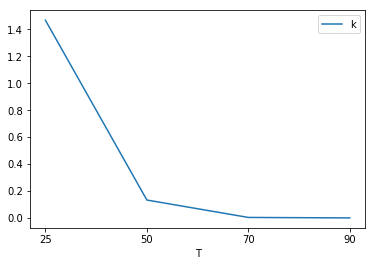

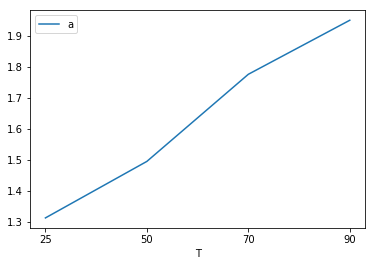

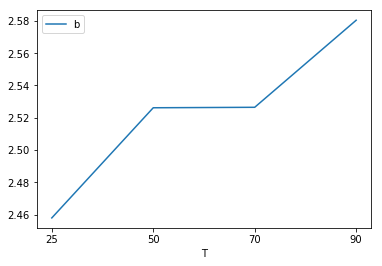

In [19]:
A=[1.4671518994928918, 1.3124703881010424, 2.4579980686752294]
B=[0.13319052864338846, 1.494529605690877, 2.5261997779705014]
C=[0.00403602010157188, 1.7751390745960558, 2.5264881910301877]
D=[0.0005113154078315542, 1.9492348065271698, 2.5803868782978836]
Label=['k','a','b']
for i in range(3):
    plt.plot(['25','50','70','90'],[A[i],B[i],C[i],D[i]],label=Label[i])
    plt.legend()
    plt.xlabel('T')
    plt.show()

In [30]:
file = open(r'E:\Users\OneDrive\桌面\Q2_retrain2.csv','rb')
data=pd.read_csv(file)
file.close()
data=np.array(data)
XX, y = data_deal(data)
X_matrix, lnP = log_x(XX,y)
train_data = np.hstack((X_matrix,XX[:,2].reshape(-1,1),lnP))
train_data

array([[10.8203781 , -2.85269244, 25.        ,  7.59987956],
       [10.8201782 , -2.76706042, 25.        ,  7.79472011],
       [10.8201782 , -2.64440986, 25.        ,  8.11154579],
       ...,
       [12.66422508, -2.19947494, 90.        , 11.45837873],
       [12.66422508, -2.0848256 , 90.        , 11.72659881],
       [12.66422508, -1.96696686, 90.        , 12.00592726]])

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = train_data[:, :3]  # 自变量
Y = train_data[:, 3]   # 因变量

# 创建多项式特征，包括交叉项
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = X_poly[:,[0,1,2,4,5]]
# 创建模型并拟合
model = LinearRegression()
model.fit(X_poly, Y)

# 获取拟合参数
K = np.append(model.coef_, model.intercept_)  # 包含 K1, K2, K3, K4, K5, K6

print("拟合参数 K:", K)

拟合参数 K: [ 1.03050380e+00  2.41619214e+00 -1.28604036e-01  1.03123511e-02
  1.84710458e-03  3.83900354e+00]


In [48]:
y_pre = model.predict(X_poly)
error = np.mean((y_pre-lnP)**2)
print(error)

7.67651915694742


In [60]:
X_poly[0,:]

array([ 10.8203781 ,  -2.85269244,  25.        , 270.50945261,
       -71.31731099])

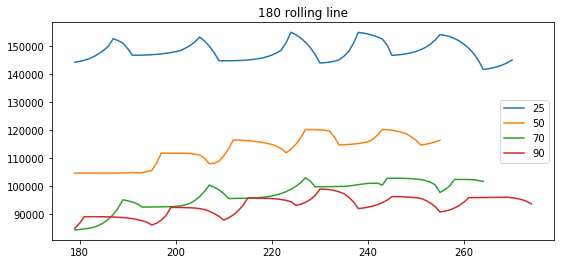

In [24]:
window=180
ro1 = test1['磁芯损耗，w/m3'].rolling(window=window).mean()
ro2 = test2['磁芯损耗，w/m3'].rolling(window=window).mean()
ro3 = test3['磁芯损耗，w/m3'].rolling(window=window).mean()
ro4 = test4['磁芯损耗，w/m3'].rolling(window=window).mean()

plt.figure(figsize=(9,4))
plt.title('180 rolling line')
plt.plot(ro1,label='25')
plt.plot(ro2,label='50')
plt.plot(ro3,label='70')
plt.plot(ro4,label='90')
plt.legend()
plt.show()

In [27]:
file = open(r'E:\Users\OneDrive\桌面\data1.csv','rb')
test1=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\data2.csv','rb')
test2=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\data3.csv','rb')
test3=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\data4.csv','rb')
test4=pd.read_csv(file)
file.close()

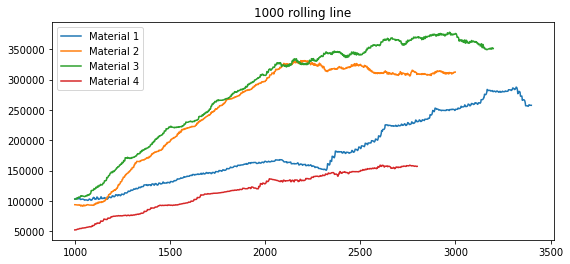

In [33]:
window=1000
ro1 = test1['磁芯损耗，w/m3'].rolling(window=window).mean()
ro2 = test2['磁芯损耗，w/m3'].rolling(window=window).mean()
ro3 = test3['磁芯损耗，w/m3'].rolling(window=window).mean()
ro4 = test4['磁芯损耗，w/m3'].rolling(window=window).mean()

plt.figure(figsize=(9,4))
plt.title('1000 rolling line')
plt.plot(ro1,label='Material 1')
plt.plot(ro2,label='Material 2')
plt.plot(ro3,label='Material 3')
plt.plot(ro4,label='Material 4')
plt.legend()
plt.show()

In [32]:
print(np.mean(test1['磁芯损耗，w/m3']),np.mean(test2['磁芯损耗，w/m3']),np.mean(test3['磁芯损耗，w/m3']),np.mean(test4['磁芯损耗，w/m3']))

179886.94421603333 234317.14430713872 264453.0732378572 109469.24906428154


In [35]:
file = open(r'E:\Users\OneDrive\桌面\M1.csv','rb')
test1=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\M2.csv','rb')
test2=pd.read_csv(file)
file.close()
file = open(r'E:\Users\OneDrive\桌面\M3.csv','rb')
test3=pd.read_csv(file)
file.close()

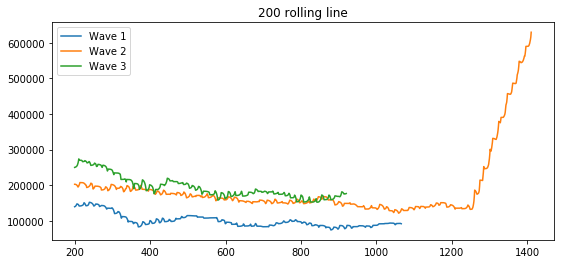

In [45]:
window=200
ro1 = test1['磁芯损耗，w/m3'].rolling(window=window).mean()
ro2 = test2['磁芯损耗，w/m3'].rolling(window=window).mean()
ro3 = test3['磁芯损耗，w/m3'].rolling(window=window).mean()

plt.figure(figsize=(9,4))
plt.title('200 rolling line')
plt.plot(ro1,label='Wave 1')
plt.plot(ro2,label='Wave 2')
plt.plot(ro3,label='Wave 3')
plt.legend()
plt.show()

In [41]:
print(np.mean(test1['磁芯损耗，w/m3']),np.mean(test2['磁芯损耗，w/m3']),np.mean(test3['磁芯损耗，w/m3']))

101712.23173082597 229194.15188467706 194860.49578345058
